# Wing Configuration Comparison Analysis

This notebook compares the straight line flight experiments between two different xwing configurations:
- **Wing 1**: L_9mps_wing1
- **Wing 2**: L_9mps_wing2

**Workflow:**
1. Load data from both configurations
2. Analyze motor speeds (rotor feedback)
3. Compare alpha (pitch angle), velocity, and position
4. Statistical comparison and performance metrics

## 1. Import Required Libraries

In [37]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 2. Configuration

In [38]:
# Configuration
wing1_data_dir = Path('../logs/09-10/L_9mps_wing1')
wing2_data_dir = Path('../logs/09-10/L_9mps_wing2')
output_dir = Path('./data')
output_dir.mkdir(parents=True, exist_ok=True)

print(f"Wing 1 data directory: {wing1_data_dir}")
print(f"Wing 2 data directory: {wing2_data_dir}")
print(f"Output directory: {output_dir}")

Wing 1 data directory: ../logs/09-10/L_9mps_wing1
Wing 2 data directory: ../logs/09-10/L_9mps_wing2
Output directory: data


## 3. Load Rotor Feedback Data (Motor Speeds)

Load all 4 rotor feedback CSV files for both wing configurations.

In [39]:
# Load rotor feedback data for both wings
print("Loading rotor feedback data for both wing configurations...\n")

rotor_data_wing1 = {}
rotor_data_wing2 = {}

# Load Wing 1 rotor data
print("=" * 60)
print("WING 1 - Rotor Feedback Data")
print("=" * 60)
for i in range(4):
    file_path = wing1_data_dir / f'rotor_feedback_{i}.csv'
    
    if file_path.exists():
        df = pd.read_csv(file_path)
        rotor_data_wing1[i] = df
        print(f"✓ Loaded rotor_feedback_{i}.csv: {len(df)} rows")
        print(f"  Time range: {df['elapsed time'].min():.3f}s - {df['elapsed time'].max():.3f}s")
        print(f"  Value range: {df['value'].min():.2f} - {df['value'].max():.2f} RPM")
    else:
        print(f"⚠ Warning: rotor_feedback_{i}.csv not found")

# Load Wing 2 rotor data
print("\n" + "=" * 60)
print("WING 2 - Rotor Feedback Data")
print("=" * 60)
for i in range(4):
    file_path = wing2_data_dir / f'rotor_feedback_{i}.csv'
    
    if file_path.exists():
        df = pd.read_csv(file_path)
        rotor_data_wing2[i] = df
        print(f"✓ Loaded rotor_feedback_{i}.csv: {len(df)} rows")
        print(f"  Time range: {df['elapsed time'].min():.3f}s - {df['elapsed time'].max():.3f}s")
        print(f"  Value range: {df['value'].min():.2f} - {df['value'].max():.2f} RPM")
    else:
        print(f"⚠ Warning: rotor_feedback_{i}.csv not found")

print(f"\n✓ Loaded {len(rotor_data_wing1)} rotor files for Wing 1")
print(f"✓ Loaded {len(rotor_data_wing2)} rotor files for Wing 2")

Loading rotor feedback data for both wing configurations...

WING 1 - Rotor Feedback Data
✓ Loaded rotor_feedback_0.csv: 8942 rows
  Time range: 0.001s - 8.984s
  Value range: 157.08 - 1840.04 RPM
✓ Loaded rotor_feedback_1.csv: 8942 rows
  Time range: 0.001s - 8.984s
  Value range: 174.99 - 1726.31 RPM
✓ Loaded rotor_feedback_2.csv: 8942 rows
  Time range: 0.001s - 8.984s
  Value range: 815.25 - 1480.95 RPM
✓ Loaded rotor_feedback_3.csv: 8942 rows
  Time range: 0.001s - 8.984s
  Value range: 523.60 - 1847.47 RPM

WING 2 - Rotor Feedback Data
✓ Loaded rotor_feedback_0.csv: 8717 rows
  Time range: 0.000s - 8.749s
  Value range: 140.53 - 1769.77 RPM
✓ Loaded rotor_feedback_1.csv: 8717 rows
  Time range: 0.000s - 8.749s
  Value range: 155.51 - 1802.65 RPM
✓ Loaded rotor_feedback_2.csv: 8717 rows
  Time range: 0.000s - 8.749s
  Value range: 146.61 - 1769.77 RPM
✓ Loaded rotor_feedback_3.csv: 8717 rows
  Time range: 0.000s - 8.749s
  Value range: 151.01 - 1828.10 RPM

✓ Loaded 4 rotor files 

## 4. Load Alpha, Velocity, and Position Data

Load the flight dynamics data for both configurations.

In [40]:
# Load alpha, velocity, and position data for both wings
print("Loading alpha, velocity, and position data...\n")

# Wing 1 data
print("=" * 60)
print("WING 1 - Flight Dynamics Data")
print("=" * 60)

alpha_file_w1 = wing1_data_dir / 'alpha.csv'
if alpha_file_w1.exists():
    df_alpha_w1 = pd.read_csv(alpha_file_w1)
    print(f"✓ Loaded alpha.csv: {len(df_alpha_w1)} rows")
    print(f"  Time range: {df_alpha_w1['elapsed time'].min():.3f}s - {df_alpha_w1['elapsed time'].max():.3f}s")
    print(f"  Value range: {df_alpha_w1['value'].min():.2f}° - {df_alpha_w1['value'].max():.2f}°")
else:
    print("⚠ Warning: alpha.csv not found")
    df_alpha_w1 = None

velocity_file_w1 = wing1_data_dir / 'velocity.csv'
if velocity_file_w1.exists():
    df_velocity_w1 = pd.read_csv(velocity_file_w1)
    print(f"\n✓ Loaded velocity.csv: {len(df_velocity_w1)} rows")
    print(f"  Time range: {df_velocity_w1['elapsed time'].min():.3f}s - {df_velocity_w1['elapsed time'].max():.3f}s")
    print(f"  Value range: {df_velocity_w1['value'].min():.2f} - {df_velocity_w1['value'].max():.2f} m/s")
else:
    print("⚠ Warning: velocity.csv not found")
    df_velocity_w1 = None

position_file_w1 = wing1_data_dir / 'position.csv'
if position_file_w1.exists():
    df_position_w1 = pd.read_csv(position_file_w1)
    print(f"\n✓ Loaded position.csv: {len(df_position_w1)} rows")
    print(f"  Time range: {df_position_w1['elapsed time'].min():.3f}s - {df_position_w1['elapsed time'].max():.3f}s")
    print(f"  Value range: {df_position_w1['value'].min():.2f} - {df_position_w1['value'].max():.2f} m")
else:
    print("⚠ Warning: position.csv not found")
    df_position_w1 = None

# Wing 2 data
print("\n" + "=" * 60)
print("WING 2 - Flight Dynamics Data")
print("=" * 60)

alpha_file_w2 = wing2_data_dir / 'alpha.csv'
if alpha_file_w2.exists():
    df_alpha_w2 = pd.read_csv(alpha_file_w2)
    print(f"✓ Loaded alpha.csv: {len(df_alpha_w2)} rows")
    print(f"  Time range: {df_alpha_w2['elapsed time'].min():.3f}s - {df_alpha_w2['elapsed time'].max():.3f}s")
    print(f"  Value range: {df_alpha_w2['value'].min():.2f}° - {df_alpha_w2['value'].max():.2f}°")
else:
    print("⚠ Warning: alpha.csv not found")
    df_alpha_w2 = None

velocity_file_w2 = wing2_data_dir / 'velocity.csv'
if velocity_file_w2.exists():
    df_velocity_w2 = pd.read_csv(velocity_file_w2)
    print(f"\n✓ Loaded velocity.csv: {len(df_velocity_w2)} rows")
    print(f"  Time range: {df_velocity_w2['elapsed time'].min():.3f}s - {df_velocity_w2['elapsed time'].max():.3f}s")
    print(f"  Value range: {df_velocity_w2['value'].min():.2f} - {df_velocity_w2['value'].max():.2f} m/s")
else:
    print("⚠ Warning: velocity.csv not found")
    df_velocity_w2 = None

position_file_w2 = wing2_data_dir / 'position.csv'
if position_file_w2.exists():
    df_position_w2 = pd.read_csv(position_file_w2)
    print(f"\n✓ Loaded position.csv: {len(df_position_w2)} rows")
    print(f"  Time range: {df_position_w2['elapsed time'].min():.3f}s - {df_position_w2['elapsed time'].max():.3f}s")
    print(f"  Value range: {df_position_w2['value'].min():.2f} - {df_position_w2['value'].max():.2f} m")
else:
    print("⚠ Warning: position.csv not found")
    df_position_w2 = None

print("\n✓ Data loading complete")

Loading alpha, velocity, and position data...

WING 1 - Flight Dynamics Data
✓ Loaded alpha.csv: 2547 rows
  Time range: 0.002s - 8.951s
  Value range: 35.87° - 102.76°

✓ Loaded velocity.csv: 5404 rows
  Time range: 0.001s - 8.993s
  Value range: -9.14 - 0.00 m/s

✓ Loaded position.csv: 2547 rows
  Time range: 0.002s - 8.951s
  Value range: -19.55 - 19.47 m

WING 2 - Flight Dynamics Data
✓ Loaded alpha.csv: 2618 rows
  Time range: 0.001s - 8.749s
  Value range: 14.96° - 102.08°

✓ Loaded velocity.csv: 5260 rows
  Time range: 0.001s - 8.747s
  Value range: -9.14 - 0.00 m/s

✓ Loaded position.csv: 2618 rows
  Time range: 0.001s - 8.749s
  Value range: -19.58 - 19.52 m

✓ Data loading complete


## 5. Calculate Average Motor Speeds

Calculate the average motor speed across all 4 motors for both wing configurations.

In [41]:
# Calculate average motor speeds for both wings
print("Calculating average motor speeds...\n")

# Wing 1
if len(rotor_data_wing1) == 4:
    min_length_w1 = min(len(df) for df in rotor_data_wing1.values())
    all_motor_speeds_w1 = np.array([df['value'].values[:min_length_w1] for df in rotor_data_wing1.values()])
    mean_speeds_w1 = np.mean(all_motor_speeds_w1, axis=0)
    std_speeds_w1 = np.std(all_motor_speeds_w1, axis=0)
    time_data_w1 = rotor_data_wing1[0]['elapsed time'].values[:min_length_w1]
    
    print(f"Wing 1 Average Motor Speed Statistics:")
    print(f"  Data points: {min_length_w1}")
    print(f"  Overall mean: {np.mean(mean_speeds_w1):.2f} RPM")
    print(f"  Overall std dev: {np.mean(std_speeds_w1):.2f} RPM")
    print(f"  Min: {mean_speeds_w1.min():.2f} RPM")
    print(f"  Max: {mean_speeds_w1.max():.2f} RPM")
else:
    print("⚠ Wing 1: Need all 4 rotor feedback files")
    mean_speeds_w1 = None
    time_data_w1 = None

# Wing 2
print()
if len(rotor_data_wing2) == 4:
    min_length_w2 = min(len(df) for df in rotor_data_wing2.values())
    all_motor_speeds_w2 = np.array([df['value'].values[:min_length_w2] for df in rotor_data_wing2.values()])
    mean_speeds_w2 = np.mean(all_motor_speeds_w2, axis=0)
    std_speeds_w2 = np.std(all_motor_speeds_w2, axis=0)
    time_data_w2 = rotor_data_wing2[0]['elapsed time'].values[:min_length_w2]
    
    print(f"Wing 2 Average Motor Speed Statistics:")
    print(f"  Data points: {min_length_w2}")
    print(f"  Overall mean: {np.mean(mean_speeds_w2):.2f} RPM")
    print(f"  Overall std dev: {np.mean(std_speeds_w2):.2f} RPM")
    print(f"  Min: {mean_speeds_w2.min():.2f} RPM")
    print(f"  Max: {mean_speeds_w2.max():.2f} RPM")
else:
    print("⚠ Wing 2: Need all 4 rotor feedback files")
    mean_speeds_w2 = None
    time_data_w2 = None

print("\n✓ Average motor speed calculation complete")

Calculating average motor speeds...

Wing 1 Average Motor Speed Statistics:
  Data points: 8942
  Overall mean: 1205.13 RPM
  Overall std dev: 59.54 RPM
  Min: 727.41 RPM
  Max: 1367.70 RPM

Wing 2 Average Motor Speed Statistics:
  Data points: 8717
  Overall mean: 1196.11 RPM
  Overall std dev: 166.53 RPM
  Min: 748.70 RPM
  Max: 1345.26 RPM

✓ Average motor speed calculation complete


## 6. Compare Average Motor Speeds

Plot and compare the average motor speeds between the two wing configurations.

Creating motor speed comparison plot...



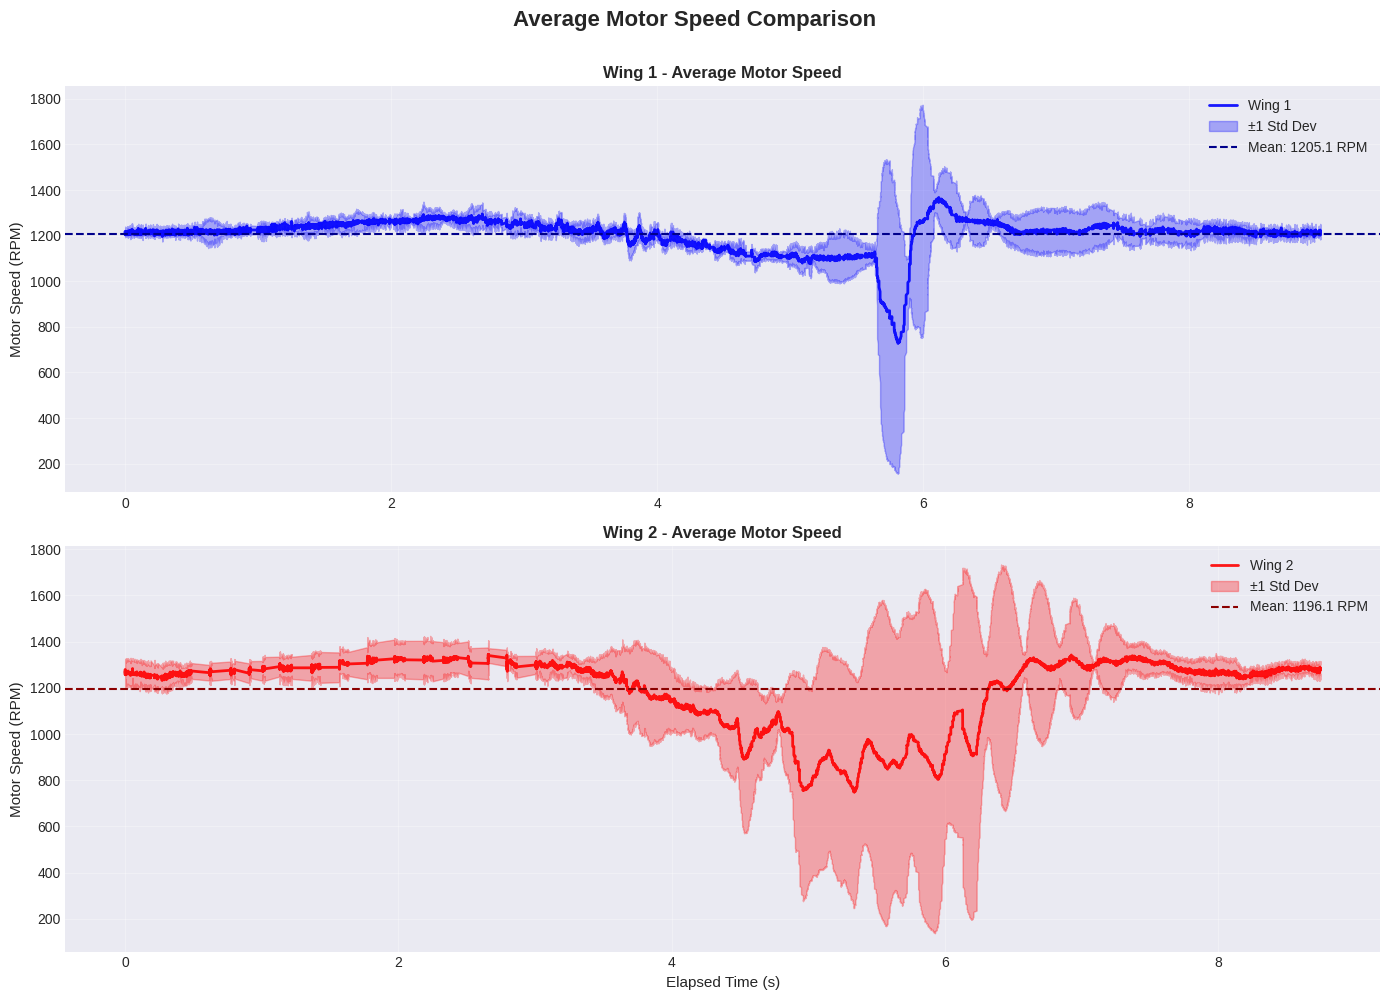

✓ Saved: wing_comparison_motor_speeds.png

Motor Speed Difference:
  Wing 1 mean: 1205.13 RPM
  Wing 2 mean: 1196.11 RPM
  Difference: -9.03 RPM (-0.75%)


In [42]:
# Compare average motor speeds
if mean_speeds_w1 is not None and mean_speeds_w2 is not None:
    print("Creating motor speed comparison plot...\n")
    
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    fig.suptitle('Average Motor Speed Comparison', fontsize=16, fontweight='bold', y=0.995)
    
    # Plot Wing 1
    axes[0].plot(time_data_w1, mean_speeds_w1, linewidth=2, color='blue', label='Wing 1', alpha=0.9)
    axes[0].fill_between(time_data_w1, mean_speeds_w1 - std_speeds_w1, mean_speeds_w1 + std_speeds_w1, 
                        alpha=0.3, color='blue', label='±1 Std Dev')
    overall_mean_w1 = np.mean(mean_speeds_w1)
    axes[0].axhline(overall_mean_w1, color='darkblue', linestyle='--', linewidth=1.5, 
                   label=f'Mean: {overall_mean_w1:.1f} RPM')
    axes[0].set_ylabel('Motor Speed (RPM)', fontsize=11)
    axes[0].set_title('Wing 1 - Average Motor Speed', fontsize=12, fontweight='bold')
    axes[0].legend(fontsize=10, loc='best')
    axes[0].grid(True, alpha=0.3)
    
    # Plot Wing 2
    axes[1].plot(time_data_w2, mean_speeds_w2, linewidth=2, color='red', label='Wing 2', alpha=0.9)
    axes[1].fill_between(time_data_w2, mean_speeds_w2 - std_speeds_w2, mean_speeds_w2 + std_speeds_w2, 
                        alpha=0.3, color='red', label='±1 Std Dev')
    overall_mean_w2 = np.mean(mean_speeds_w2)
    axes[1].axhline(overall_mean_w2, color='darkred', linestyle='--', linewidth=1.5, 
                   label=f'Mean: {overall_mean_w2:.1f} RPM')
    axes[1].set_xlabel('Elapsed Time (s)', fontsize=11)
    axes[1].set_ylabel('Motor Speed (RPM)', fontsize=11)
    axes[1].set_title('Wing 2 - Average Motor Speed', fontsize=12, fontweight='bold')
    axes[1].legend(fontsize=10, loc='best')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout(rect=[0, 0, 1, 0.99])
    plt.savefig(output_dir / 'wing_comparison_motor_speeds.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"✓ Saved: wing_comparison_motor_speeds.png")
    print(f"\nMotor Speed Difference:")
    print(f"  Wing 1 mean: {overall_mean_w1:.2f} RPM")
    print(f"  Wing 2 mean: {overall_mean_w2:.2f} RPM")
    print(f"  Difference: {overall_mean_w2 - overall_mean_w1:.2f} RPM ({((overall_mean_w2 - overall_mean_w1) / overall_mean_w1 * 100):.2f}%)")
else:
    print("⚠ Cannot create motor speed comparison - missing data")

## 7. Compare Individual Motor Speeds

Compare each motor individually between the two configurations.

Creating individual motor comparison plots...



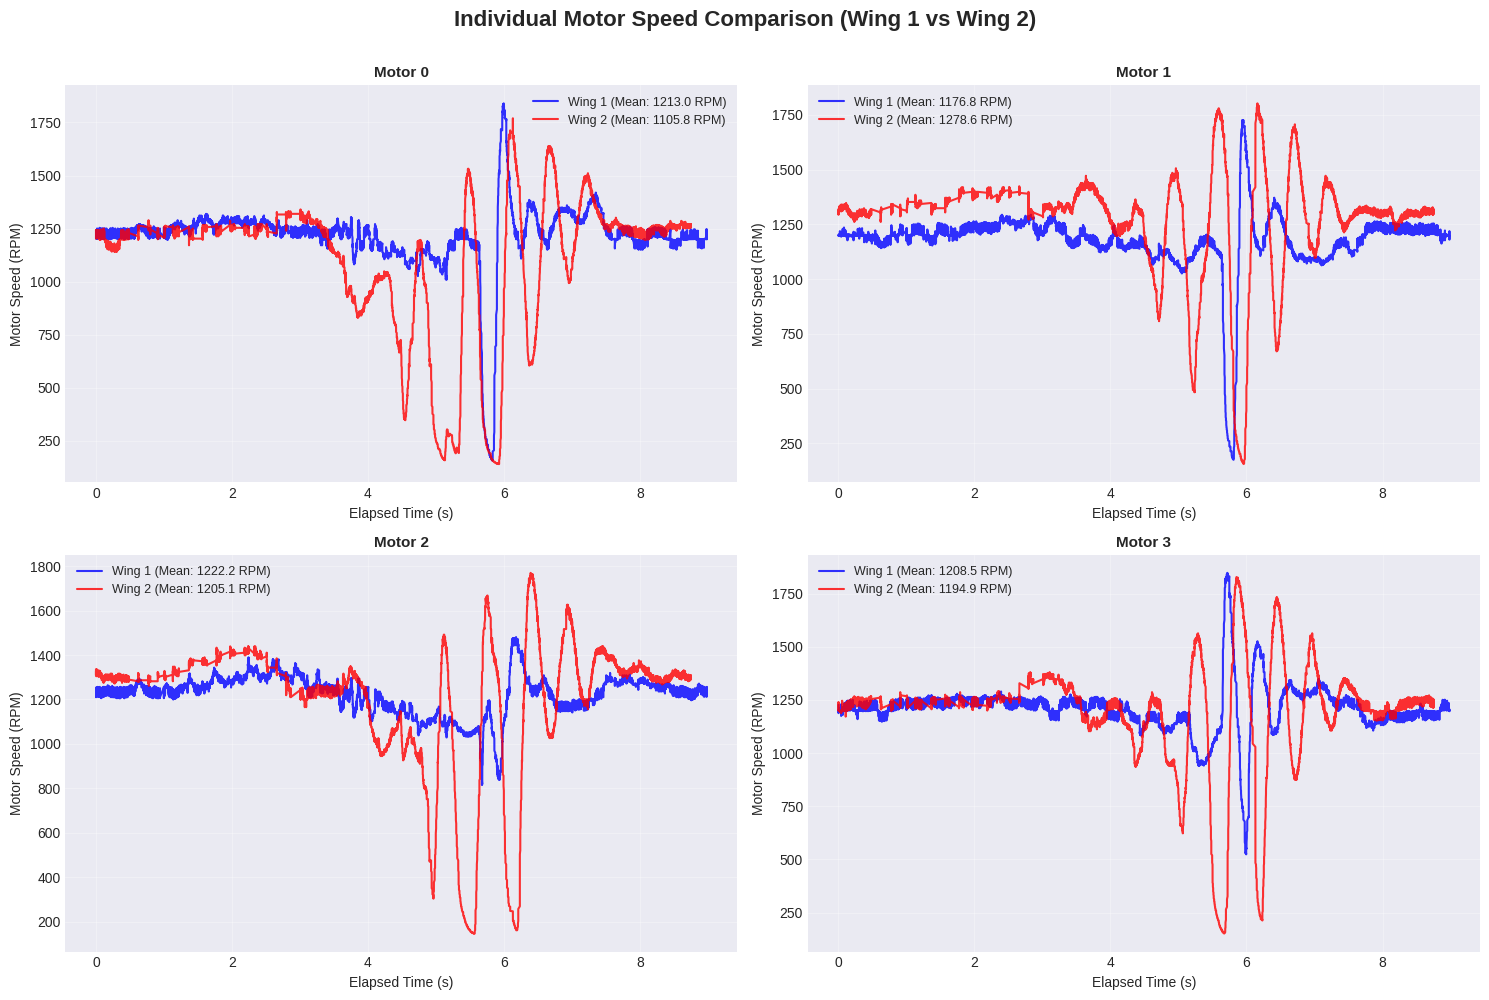

✓ Saved: wing_comparison_individual_motors.png

Individual Motor Comparison:
  Motor 0: Wing1=1213.01 RPM, Wing2=1105.78 RPM, Diff=-107.22 RPM (-8.84%)
  Motor 1: Wing1=1176.81 RPM, Wing2=1278.65 RPM, Diff=101.83 RPM (+8.65%)
  Motor 2: Wing1=1222.25 RPM, Wing2=1205.10 RPM, Diff=-17.15 RPM (-1.40%)
  Motor 3: Wing1=1208.47 RPM, Wing2=1194.90 RPM, Diff=-13.57 RPM (-1.12%)


In [43]:
# Compare individual motor speeds
if len(rotor_data_wing1) == 4 and len(rotor_data_wing2) == 4:
    print("Creating individual motor comparison plots...\n")
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Individual Motor Speed Comparison (Wing 1 vs Wing 2)', fontsize=16, fontweight='bold', y=0.995)
    
    axes = axes.flatten()
    
    for i in range(4):
        ax = axes[i]
        
        # Plot Wing 1 motor
        df_w1 = rotor_data_wing1[i]
        ax.plot(df_w1['elapsed time'], df_w1['value'], linewidth=1.5, alpha=0.8, 
               color='blue', label=f'Wing 1 (Mean: {df_w1["value"].mean():.1f} RPM)')
        
        # Plot Wing 2 motor
        df_w2 = rotor_data_wing2[i]
        ax.plot(df_w2['elapsed time'], df_w2['value'], linewidth=1.5, alpha=0.8, 
               color='red', label=f'Wing 2 (Mean: {df_w2["value"].mean():.1f} RPM)')
        
        ax.set_xlabel('Elapsed Time (s)', fontsize=10)
        ax.set_ylabel('Motor Speed (RPM)', fontsize=10)
        ax.set_title(f'Motor {i}', fontsize=11, fontweight='bold')
        ax.legend(fontsize=9, loc='best')
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout(rect=[0, 0, 1, 0.99])
    plt.savefig(output_dir / 'wing_comparison_individual_motors.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"✓ Saved: wing_comparison_individual_motors.png")
    
    # Print individual motor statistics
    print(f"\nIndividual Motor Comparison:")
    for i in range(4):
        mean_w1 = rotor_data_wing1[i]['value'].mean()
        mean_w2 = rotor_data_wing2[i]['value'].mean()
        diff = mean_w2 - mean_w1
        diff_pct = (diff / mean_w1) * 100
        print(f"  Motor {i}: Wing1={mean_w1:.2f} RPM, Wing2={mean_w2:.2f} RPM, Diff={diff:.2f} RPM ({diff_pct:+.2f}%)")
else:
    print("⚠ Cannot create individual motor comparison - missing data")

## 8. Compare Alpha (Pitch Angle)

Compare the pitch angle between the two wing configurations.

Creating alpha comparison plot...



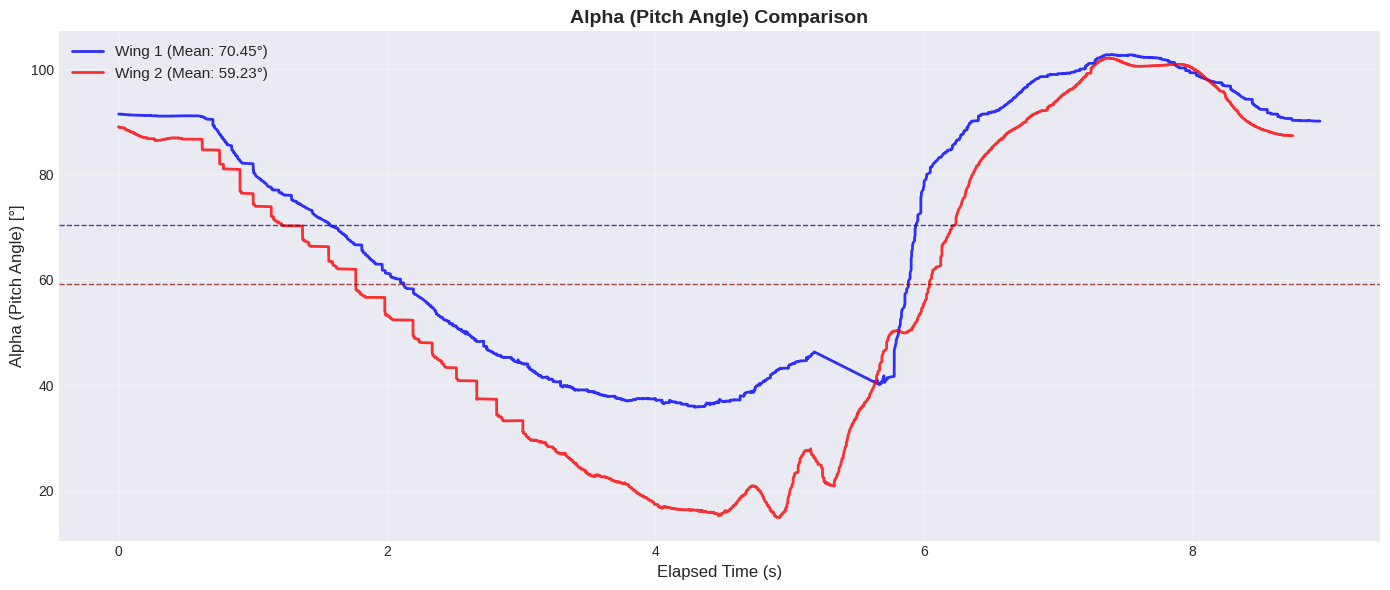

✓ Saved: wing_comparison_alpha.png

Alpha Statistics:
  Wing 1 mean: 70.45°
  Wing 2 mean: 59.23°
  Difference: -11.22°
  Wing 1 std: 24.23°
  Wing 2 std: 29.95°


In [44]:
# Compare alpha (pitch angle)
if df_alpha_w1 is not None and df_alpha_w2 is not None:
    print("Creating alpha comparison plot...\n")
    
    fig, ax = plt.subplots(1, 1, figsize=(14, 6))
    
    # Plot Wing 1 alpha
    mean_alpha_w1 = df_alpha_w1['value'].mean()
    ax.plot(df_alpha_w1['elapsed time'], df_alpha_w1['value'], linewidth=2, alpha=0.8, 
           color='blue', label=f'Wing 1 (Mean: {mean_alpha_w1:.2f}°)')
    
    # Plot Wing 2 alpha
    mean_alpha_w2 = df_alpha_w2['value'].mean()
    ax.plot(df_alpha_w2['elapsed time'], df_alpha_w2['value'], linewidth=2, alpha=0.8, 
           color='red', label=f'Wing 2 (Mean: {mean_alpha_w2:.2f}°)')
    
    # Add mean lines
    ax.axhline(mean_alpha_w1, color='darkblue', linestyle='--', linewidth=1, alpha=0.7)
    ax.axhline(mean_alpha_w2, color='darkred', linestyle='--', linewidth=1, alpha=0.7)
    
    ax.set_xlabel('Elapsed Time (s)', fontsize=12)
    ax.set_ylabel('Alpha (Pitch Angle) [°]', fontsize=12)
    ax.set_title('Alpha (Pitch Angle) Comparison', fontsize=14, fontweight='bold')
    ax.legend(fontsize=11, loc='best')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(output_dir / 'wing_comparison_alpha.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"✓ Saved: wing_comparison_alpha.png")
    print(f"\nAlpha Statistics:")
    print(f"  Wing 1 mean: {mean_alpha_w1:.2f}°")
    print(f"  Wing 2 mean: {mean_alpha_w2:.2f}°")
    print(f"  Difference: {mean_alpha_w2 - mean_alpha_w1:.2f}°")
    print(f"  Wing 1 std: {df_alpha_w1['value'].std():.2f}°")
    print(f"  Wing 2 std: {df_alpha_w2['value'].std():.2f}°")
else:
    print("⚠ Cannot create alpha comparison - missing data")

## 9. Compare Velocity

Compare the forward velocity between the two wing configurations.

Creating velocity comparison plot...



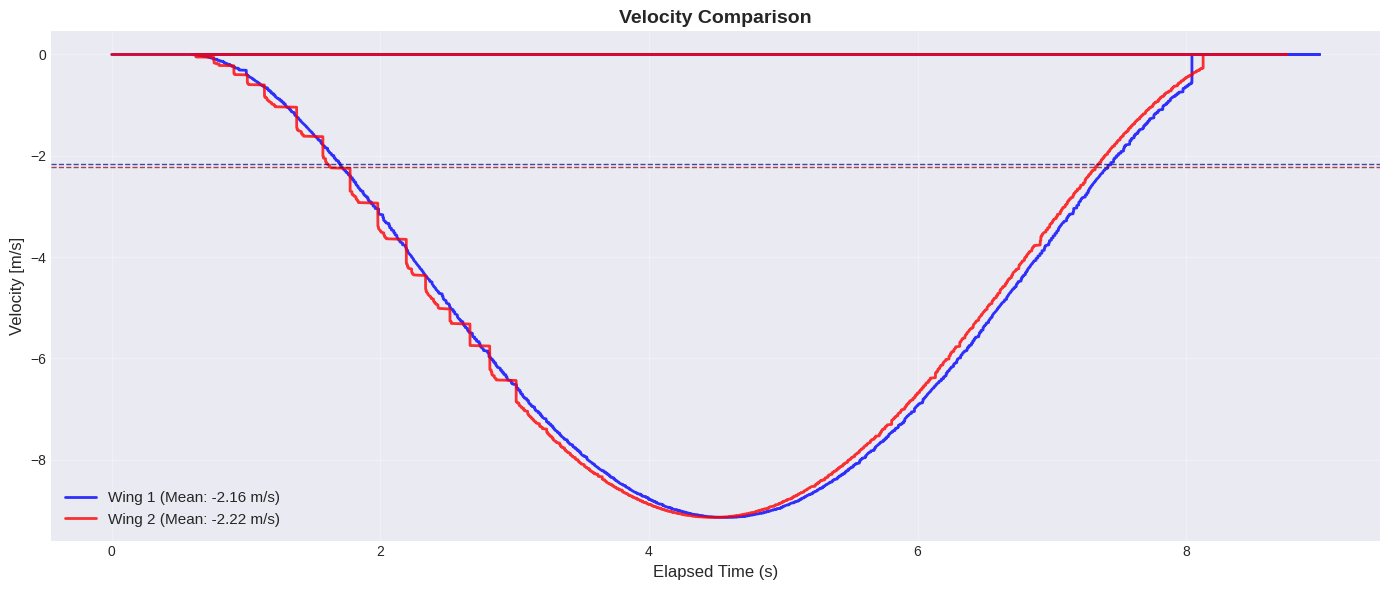

✓ Saved: wing_comparison_velocity.png

Velocity Statistics:
  Wing 1 mean: -2.16 m/s
  Wing 2 mean: -2.22 m/s
  Difference: -0.06 m/s
  Wing 1 std: 3.23 m/s
  Wing 2 std: 3.25 m/s


In [45]:
# Compare velocity
if df_velocity_w1 is not None and df_velocity_w2 is not None:
    print("Creating velocity comparison plot...\n")
    
    fig, ax = plt.subplots(1, 1, figsize=(14, 6))
    
    # Plot Wing 1 velocity
    mean_vel_w1 = df_velocity_w1['value'].mean()
    ax.plot(df_velocity_w1['elapsed time'], df_velocity_w1['value'], linewidth=2, alpha=0.8, 
           color='blue', label=f'Wing 1 (Mean: {mean_vel_w1:.2f} m/s)')
    
    # Plot Wing 2 velocity
    mean_vel_w2 = df_velocity_w2['value'].mean()
    ax.plot(df_velocity_w2['elapsed time'], df_velocity_w2['value'], linewidth=2, alpha=0.8, 
           color='red', label=f'Wing 2 (Mean: {mean_vel_w2:.2f} m/s)')
    
    # Add mean lines
    ax.axhline(mean_vel_w1, color='darkblue', linestyle='--', linewidth=1, alpha=0.7)
    ax.axhline(mean_vel_w2, color='darkred', linestyle='--', linewidth=1, alpha=0.7)
    
    ax.set_xlabel('Elapsed Time (s)', fontsize=12)
    ax.set_ylabel('Velocity [m/s]', fontsize=12)
    ax.set_title('Velocity Comparison', fontsize=14, fontweight='bold')
    ax.legend(fontsize=11, loc='best')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(output_dir / 'wing_comparison_velocity.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"✓ Saved: wing_comparison_velocity.png")
    print(f"\nVelocity Statistics:")
    print(f"  Wing 1 mean: {mean_vel_w1:.2f} m/s")
    print(f"  Wing 2 mean: {mean_vel_w2:.2f} m/s")
    print(f"  Difference: {mean_vel_w2 - mean_vel_w1:.2f} m/s")
    print(f"  Wing 1 std: {df_velocity_w1['value'].std():.2f} m/s")
    print(f"  Wing 2 std: {df_velocity_w2['value'].std():.2f} m/s")
else:
    print("⚠ Cannot create velocity comparison - missing data")

## 10. Compare Position

Compare the position data between the two wing configurations.

Creating position comparison plot...



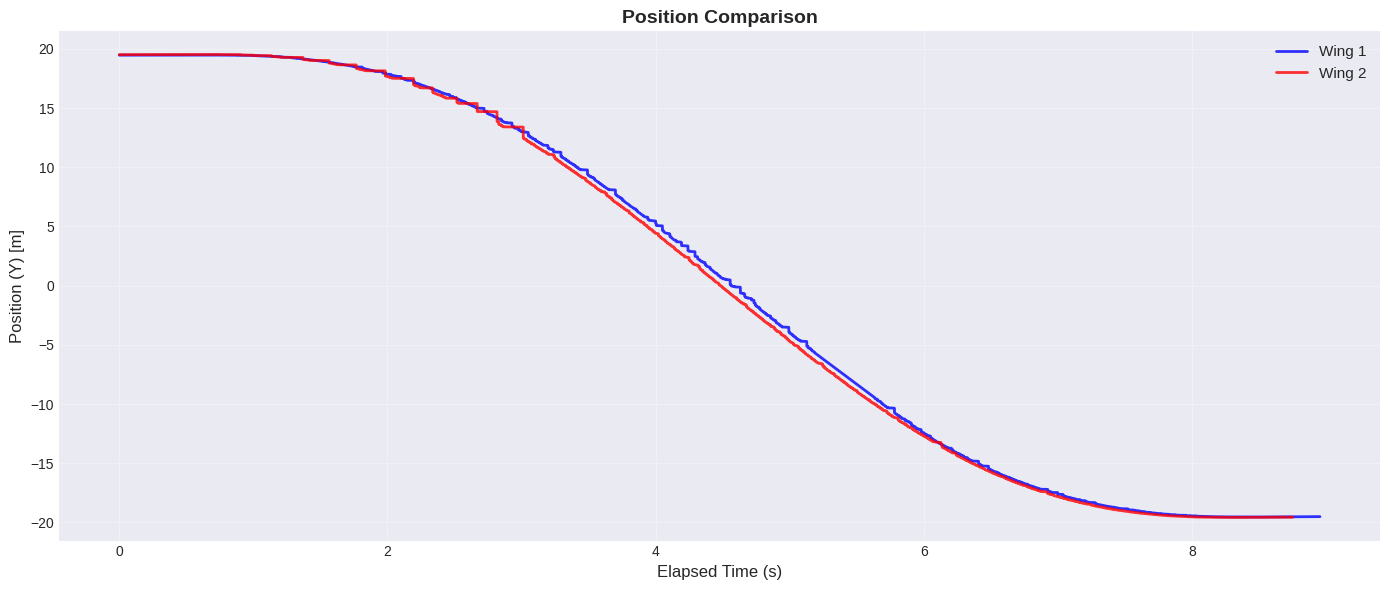

✓ Saved: wing_comparison_position.png

Position Statistics:
  Wing 1 range: -19.55 to 19.47 m
  Wing 2 range: -19.58 to 19.52 m
  Wing 1 total distance: 39.02 m
  Wing 2 total distance: 39.10 m


In [46]:
# Compare position
if df_position_w1 is not None and df_position_w2 is not None:
    print("Creating position comparison plot...\n")
    
    fig, ax = plt.subplots(1, 1, figsize=(14, 6))
    
    # Plot Wing 1 position
    ax.plot(df_position_w1['elapsed time'], df_position_w1['value'], linewidth=2, alpha=0.8, 
           color='blue', label='Wing 1')
    
    # Plot Wing 2 position
    ax.plot(df_position_w2['elapsed time'], df_position_w2['value'], linewidth=2, alpha=0.8, 
           color='red', label='Wing 2')
    
    ax.set_xlabel('Elapsed Time (s)', fontsize=12)
    ax.set_ylabel('Position (Y) [m]', fontsize=12)
    ax.set_title('Position Comparison', fontsize=14, fontweight='bold')
    ax.legend(fontsize=11, loc='best')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(output_dir / 'wing_comparison_position.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print(f"✓ Saved: wing_comparison_position.png")
    print(f"\nPosition Statistics:")
    print(f"  Wing 1 range: {df_position_w1['value'].min():.2f} to {df_position_w1['value'].max():.2f} m")
    print(f"  Wing 2 range: {df_position_w2['value'].min():.2f} to {df_position_w2['value'].max():.2f} m")
    print(f"  Wing 1 total distance: {df_position_w1['value'].max() - df_position_w1['value'].min():.2f} m")
    print(f"  Wing 2 total distance: {df_position_w2['value'].max() - df_position_w2['value'].min():.2f} m")
else:
    print("⚠ Cannot create position comparison - missing data")

## 11. Combined Summary Comparison

Create a comprehensive comparison plot showing all key metrics side by side.

Creating combined summary comparison plot...



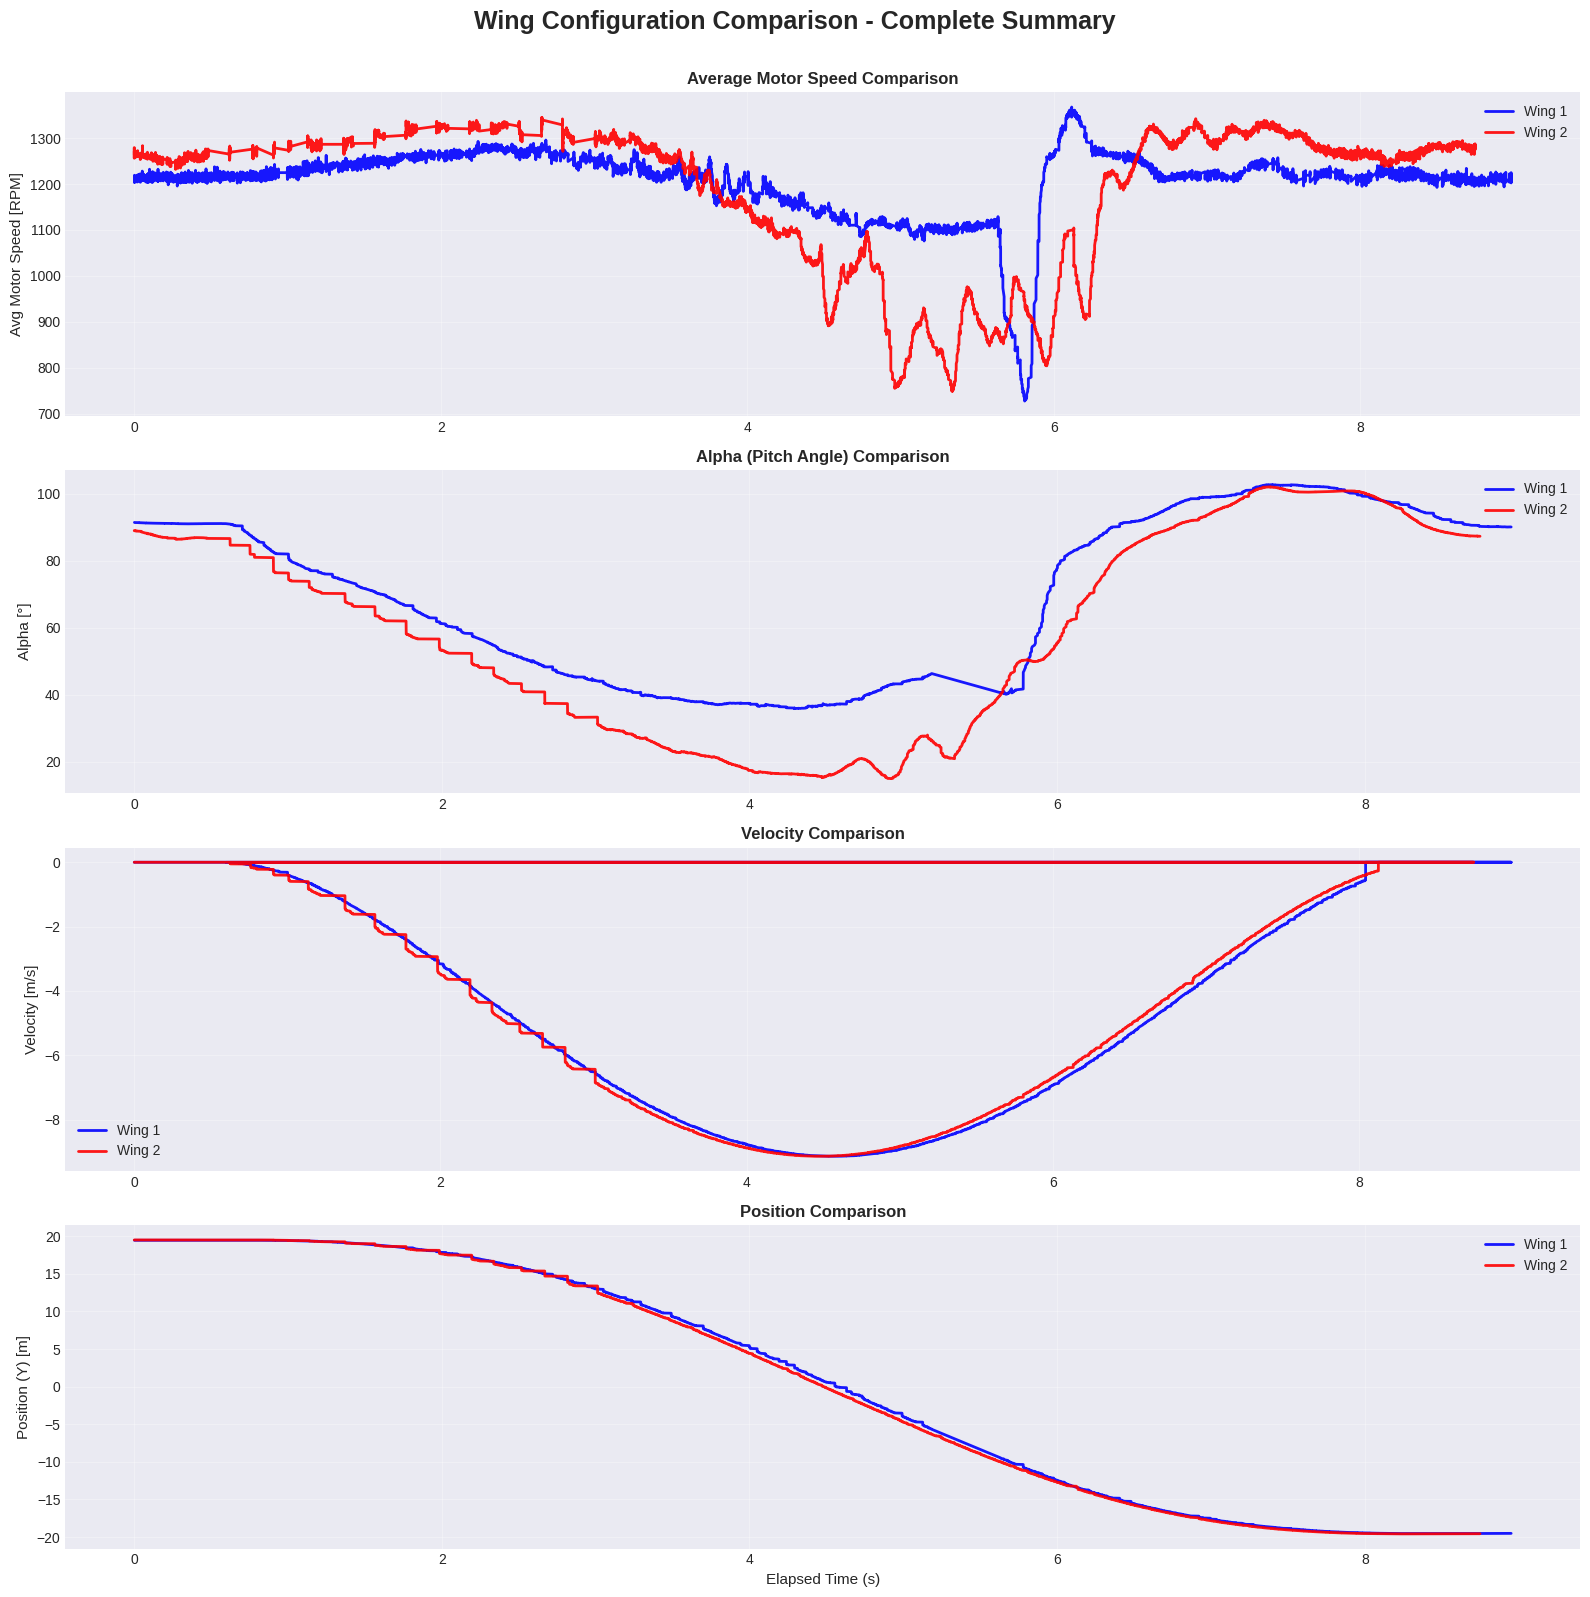

✓ Saved: wing_comparison_complete_summary.png


In [47]:
# Combined summary comparison
print("Creating combined summary comparison plot...\n")

fig, axes = plt.subplots(4, 1, figsize=(16, 16))
fig.suptitle('Wing Configuration Comparison - Complete Summary', fontsize=18, fontweight='bold', y=0.995)

# Plot 1: Average Motor Speed
if mean_speeds_w1 is not None and mean_speeds_w2 is not None:
    axes[0].plot(time_data_w1, mean_speeds_w1, linewidth=2, color='blue', label='Wing 1', alpha=0.9)
    axes[0].plot(time_data_w2, mean_speeds_w2, linewidth=2, color='red', label='Wing 2', alpha=0.9)
    axes[0].set_ylabel('Avg Motor Speed [RPM]', fontsize=11)
    axes[0].set_title('Average Motor Speed Comparison', fontsize=12, fontweight='bold')
    axes[0].legend(fontsize=10, loc='best')
    axes[0].grid(True, alpha=0.3)
else:
    axes[0].text(0.5, 0.5, 'Motor speed data not available', ha='center', va='center', 
                transform=axes[0].transAxes, fontsize=12)

# Plot 2: Alpha
if df_alpha_w1 is not None and df_alpha_w2 is not None:
    axes[1].plot(df_alpha_w1['elapsed time'], df_alpha_w1['value'], linewidth=2, color='blue', label='Wing 1', alpha=0.9)
    axes[1].plot(df_alpha_w2['elapsed time'], df_alpha_w2['value'], linewidth=2, color='red', label='Wing 2', alpha=0.9)
    axes[1].set_ylabel('Alpha [°]', fontsize=11)
    axes[1].set_title('Alpha (Pitch Angle) Comparison', fontsize=12, fontweight='bold')
    axes[1].legend(fontsize=10, loc='best')
    axes[1].grid(True, alpha=0.3)
else:
    axes[1].text(0.5, 0.5, 'Alpha data not available', ha='center', va='center', 
                transform=axes[1].transAxes, fontsize=12)

# Plot 3: Velocity
if df_velocity_w1 is not None and df_velocity_w2 is not None:
    axes[2].plot(df_velocity_w1['elapsed time'], df_velocity_w1['value'], linewidth=2, color='blue', label='Wing 1', alpha=0.9)
    axes[2].plot(df_velocity_w2['elapsed time'], df_velocity_w2['value'], linewidth=2, color='red', label='Wing 2', alpha=0.9)
    axes[2].set_ylabel('Velocity [m/s]', fontsize=11)
    axes[2].set_title('Velocity Comparison', fontsize=12, fontweight='bold')
    axes[2].legend(fontsize=10, loc='best')
    axes[2].grid(True, alpha=0.3)
else:
    axes[2].text(0.5, 0.5, 'Velocity data not available', ha='center', va='center', 
                transform=axes[2].transAxes, fontsize=12)

# Plot 4: Position
if df_position_w1 is not None and df_position_w2 is not None:
    axes[3].plot(df_position_w1['elapsed time'], df_position_w1['value'], linewidth=2, color='blue', label='Wing 1', alpha=0.9)
    axes[3].plot(df_position_w2['elapsed time'], df_position_w2['value'], linewidth=2, color='red', label='Wing 2', alpha=0.9)
    axes[3].set_ylabel('Position (Y) [m]', fontsize=11)
    axes[3].set_xlabel('Elapsed Time (s)', fontsize=11)
    axes[3].set_title('Position Comparison', fontsize=12, fontweight='bold')
    axes[3].legend(fontsize=10, loc='best')
    axes[3].grid(True, alpha=0.3)
else:
    axes[3].text(0.5, 0.5, 'Position data not available', ha='center', va='center', 
                transform=axes[3].transAxes, fontsize=12)
    axes[3].set_xlabel('Elapsed Time (s)', fontsize=11)

plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.savefig(output_dir / 'wing_comparison_complete_summary.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"✓ Saved: wing_comparison_complete_summary.png")

## 11b. Combined Summary Comparison - Smoothed Signals

Create a comprehensive comparison plot with smoothed versions of all signals for clearer trend visualization.

Creating combined summary comparison plot with moving average...



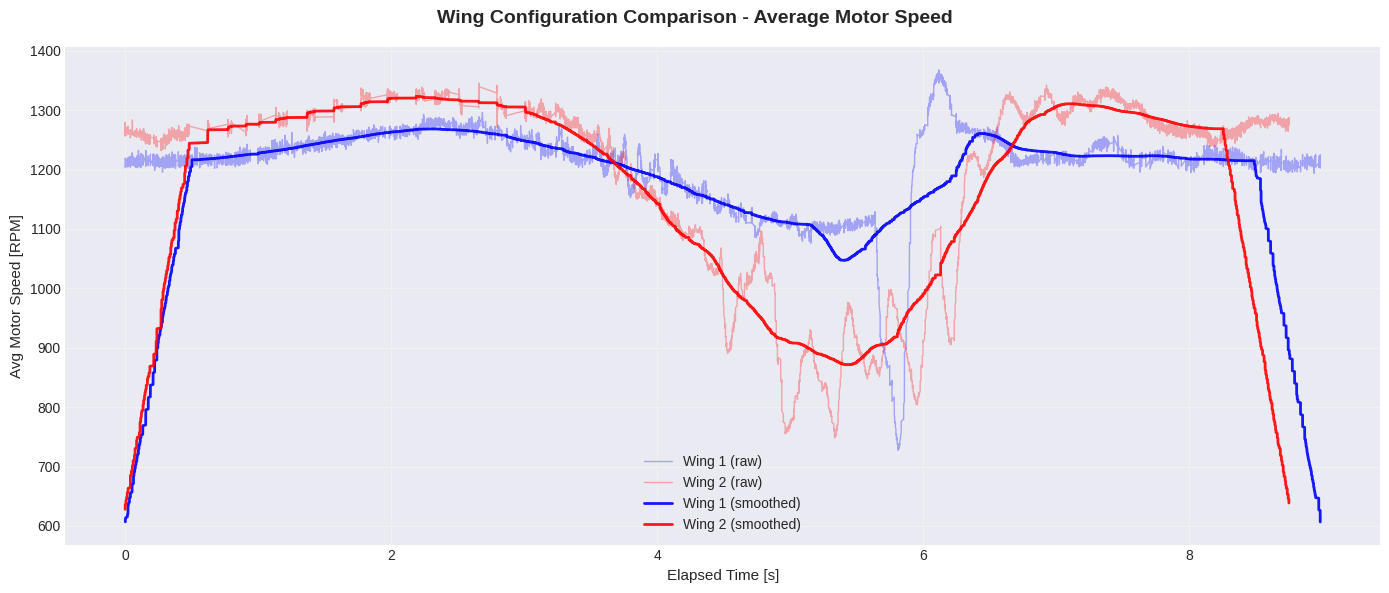

✓ Saved: wing_comparison_motor_speed.png


In [69]:
import numpy as np

# Combined summary comparison with moving average
print("Creating combined summary comparison plot with moving average...\n")

fig, ax = plt.subplots(1, 1, figsize=(14, 6))
fig.suptitle('Wing Configuration Comparison - Average Motor Speed', fontsize=14, fontweight='bold')

# Plot Average Motor Speed
if mean_speeds_w1 is not None and mean_speeds_w2 is not None:
    # Original signals (lighter/transparent)
    ax.plot(time_data_w1, mean_speeds_w1, linewidth=1, color='blue', label='Wing 1 (raw)', alpha=0.3)
    ax.plot(time_data_w2, mean_speeds_w2, linewidth=1, color='red', label='Wing 2 (raw)', alpha=0.3)
    
    # Moving average filter
    window_size = 1000  # Adjust this for more/less smoothing
    
    # Apply moving average to Wing 1
    smoothed_w1 = np.convolve(mean_speeds_w1, np.ones(window_size)/window_size, mode='same')
    ax.plot(time_data_w1, smoothed_w1, linewidth=2, color='blue', label='Wing 1 (smoothed)', alpha=0.9)
    
    # Apply moving average to Wing 2
    smoothed_w2 = np.convolve(mean_speeds_w2, np.ones(window_size)/window_size, mode='same')
    ax.plot(time_data_w2, smoothed_w2, linewidth=2, color='red', label='Wing 2 (smoothed)', alpha=0.9)
    
    ax.set_ylabel('Avg Motor Speed [RPM]', fontsize=11)
    ax.set_xlabel('Elapsed Time [s]', fontsize=11)
    ax.legend(fontsize=10, loc='best')
    ax.grid(True, alpha=0.3)
else:
    ax.text(0.5, 0.5, 'Motor speed data not available', ha='center', va='center', 
            transform=ax.transAxes, fontsize=12)

plt.tight_layout()
plt.savefig(output_dir / 'wing_comparison_motor_speed.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"✓ Saved: wing_comparison_motor_speed.png")

## 12. Statistical Summary

Generate comprehensive statistical comparison between the two wing configurations.

In [48]:
# Statistical summary
print("=" * 80)
print("STATISTICAL COMPARISON SUMMARY")
print("=" * 80)

# Motor Speed Statistics
if mean_speeds_w1 is not None and mean_speeds_w2 is not None:
    print("\n1. AVERAGE MOTOR SPEED")
    print("-" * 80)
    overall_mean_w1 = np.mean(mean_speeds_w1)
    overall_mean_w2 = np.mean(mean_speeds_w2)
    overall_std_w1 = np.mean(std_speeds_w1)
    overall_std_w2 = np.mean(std_speeds_w2)
    
    print(f"Wing 1:")
    print(f"  Mean: {overall_mean_w1:.2f} RPM")
    print(f"  Std Dev: {overall_std_w1:.2f} RPM")
    print(f"  Min: {mean_speeds_w1.min():.2f} RPM")
    print(f"  Max: {mean_speeds_w1.max():.2f} RPM")
    
    print(f"\nWing 2:")
    print(f"  Mean: {overall_mean_w2:.2f} RPM")
    print(f"  Std Dev: {overall_std_w2:.2f} RPM")
    print(f"  Min: {mean_speeds_w2.min():.2f} RPM")
    print(f"  Max: {mean_speeds_w2.max():.2f} RPM")
    
    print(f"\nDifference (Wing 2 - Wing 1):")
    print(f"  Mean difference: {overall_mean_w2 - overall_mean_w1:.2f} RPM ({((overall_mean_w2 - overall_mean_w1) / overall_mean_w1 * 100):+.2f}%)")
    print(f"  Std Dev difference: {overall_std_w2 - overall_std_w1:.2f} RPM")

# Alpha Statistics
if df_alpha_w1 is not None and df_alpha_w2 is not None:
    print("\n2. ALPHA (PITCH ANGLE)")
    print("-" * 80)
    mean_alpha_w1 = df_alpha_w1['value'].mean()
    mean_alpha_w2 = df_alpha_w2['value'].mean()
    std_alpha_w1 = df_alpha_w1['value'].std()
    std_alpha_w2 = df_alpha_w2['value'].std()
    
    print(f"Wing 1:")
    print(f"  Mean: {mean_alpha_w1:.2f}°")
    print(f"  Std Dev: {std_alpha_w1:.2f}°")
    print(f"  Min: {df_alpha_w1['value'].min():.2f}°")
    print(f"  Max: {df_alpha_w1['value'].max():.2f}°")
    
    print(f"\nWing 2:")
    print(f"  Mean: {mean_alpha_w2:.2f}°")
    print(f"  Std Dev: {std_alpha_w2:.2f}°")
    print(f"  Min: {df_alpha_w2['value'].min():.2f}°")
    print(f"  Max: {df_alpha_w2['value'].max():.2f}°")
    
    print(f"\nDifference (Wing 2 - Wing 1):")
    print(f"  Mean difference: {mean_alpha_w2 - mean_alpha_w1:.2f}°")
    print(f"  Std Dev difference: {std_alpha_w2 - std_alpha_w1:.2f}°")

# Velocity Statistics
if df_velocity_w1 is not None and df_velocity_w2 is not None:
    print("\n3. VELOCITY")
    print("-" * 80)
    mean_vel_w1 = df_velocity_w1['value'].mean()
    mean_vel_w2 = df_velocity_w2['value'].mean()
    std_vel_w1 = df_velocity_w1['value'].std()
    std_vel_w2 = df_velocity_w2['value'].std()
    
    print(f"Wing 1:")
    print(f"  Mean: {mean_vel_w1:.2f} m/s")
    print(f"  Std Dev: {std_vel_w1:.2f} m/s")
    print(f"  Min: {df_velocity_w1['value'].min():.2f} m/s")
    print(f"  Max: {df_velocity_w1['value'].max():.2f} m/s")
    
    print(f"\nWing 2:")
    print(f"  Mean: {mean_vel_w2:.2f} m/s")
    print(f"  Std Dev: {std_vel_w2:.2f} m/s")
    print(f"  Min: {df_velocity_w2['value'].min():.2f} m/s")
    print(f"  Max: {df_velocity_w2['value'].max():.2f} m/s")
    
    print(f"\nDifference (Wing 2 - Wing 1):")
    print(f"  Mean difference: {mean_vel_w2 - mean_vel_w1:.2f} m/s ({((mean_vel_w2 - mean_vel_w1) / mean_vel_w1 * 100):+.2f}%)")
    print(f"  Std Dev difference: {std_vel_w2 - std_vel_w1:.2f} m/s")

# Position Statistics
if df_position_w1 is not None and df_position_w2 is not None:
    print("\n4. POSITION (Y)")
    print("-" * 80)
    
    print(f"Wing 1:")
    print(f"  Range: {df_position_w1['value'].min():.2f} to {df_position_w1['value'].max():.2f} m")
    print(f"  Total distance: {df_position_w1['value'].max() - df_position_w1['value'].min():.2f} m")
    
    print(f"\nWing 2:")
    print(f"  Range: {df_position_w2['value'].min():.2f} to {df_position_w2['value'].max():.2f} m")
    print(f"  Total distance: {df_position_w2['value'].max() - df_position_w2['value'].min():.2f} m")

print("\n" + "=" * 80)
print("\n✓ Statistical comparison complete")

STATISTICAL COMPARISON SUMMARY

1. AVERAGE MOTOR SPEED
--------------------------------------------------------------------------------
Wing 1:
  Mean: 1205.13 RPM
  Std Dev: 59.54 RPM
  Min: 727.41 RPM
  Max: 1367.70 RPM

Wing 2:
  Mean: 1196.11 RPM
  Std Dev: 166.53 RPM
  Min: 748.70 RPM
  Max: 1345.26 RPM

Difference (Wing 2 - Wing 1):
  Mean difference: -9.03 RPM (-0.75%)
  Std Dev difference: 106.99 RPM

2. ALPHA (PITCH ANGLE)
--------------------------------------------------------------------------------
Wing 1:
  Mean: 70.45°
  Std Dev: 24.23°
  Min: 35.87°
  Max: 102.76°

Wing 2:
  Mean: 59.23°
  Std Dev: 29.95°
  Min: 14.96°
  Max: 102.08°

Difference (Wing 2 - Wing 1):
  Mean difference: -11.22°
  Std Dev difference: 5.71°

3. VELOCITY
--------------------------------------------------------------------------------
Wing 1:
  Mean: -2.16 m/s
  Std Dev: 3.23 m/s
  Min: -9.14 m/s
  Max: 0.00 m/s

Wing 2:
  Mean: -2.22 m/s
  Std Dev: 3.25 m/s
  Min: -9.14 m/s
  Max: 0.00 m/s

Di

## 13. Analysis Complete

The wing configuration comparison analysis is complete. All plots and statistics have been generated and saved to the `data/` directory.